In [1]:
from hastur.arms import Arm
from hastur.observations import Observation
from hastur.bandits import Bandit
from hastur.bandits import GreedyBandit
from hastur.bandits import EpsilonGreedyBandit
from hastur.bandits import BayesianBandit
from hastur.bandits import EpsilonBayesianBandit
from hastur.bandits import UpperConfidenceBoundBandit
import statistics
import random
from matplotlib import pyplot as plt
% matplotlib inline

ImportError: No module named 'exceptions'

In [13]:


bandits = {'Greedy':{'model':GreedyBandit()}, 
           'Bayesian':{'model':BayesianBandit()},
           'EpsilonGreedy 0.1':{'model':EpsilonGreedyBandit(epsilon=0.1)}, 
           'EpsilonBayesian 0.1':{'model':EpsilonBayesianBandit(epsilon=0.1)},
           'UpperConfidenceBound':{'model':UpperConfidenceBoundBandit()}}

for b in bandits.keys():
    x = bandits[b]['model'].add_arm(Arm(), arm_name = 'three')
    bandits[b]['model'].add_arm(Arm(), arm_name = 'five')
    bandits[b]['model'].add_arm(Arm(), arm_name = 'seven')

    for arm in ['three', 'five', 'seven']:
        bandits[b]['model'].arms[arm].update(Observation(1))
        bandits[b]['model'].arms[arm].update(Observation(0))
        
    bandits[b]['vals'] = {'three':{'y':[],'x':[]}, 
            'five':{'y':[],'x':[]}, 
            'seven':{'y':[],'x':[]}}
    

In [15]:
iterations = 10

for bandit in bandits.values():
    b = bandit['model']

    for x in range(0,iterations):
        selected_arm, valuation = b.select_arm()

        bandit['vals'][selected_arm]['y'].append(valuation)
        bandit['vals'][selected_arm]['x'].append(x)
        result = random.random()
        outcome = 1
        if selected_arm == 'three' and result >.3:
            outcome = 0
        if selected_arm == 'five' and result >.5:
            outcome = 0
        if selected_arm == 'seven' and result > .7:
            outcome = 0

        b.arms[selected_arm].update(Observation(outcome))



In [27]:
for b in bandits.keys():
    model = bandits[b]['bandit']
    vals = b['vals']

TypeError: string indices must be integers

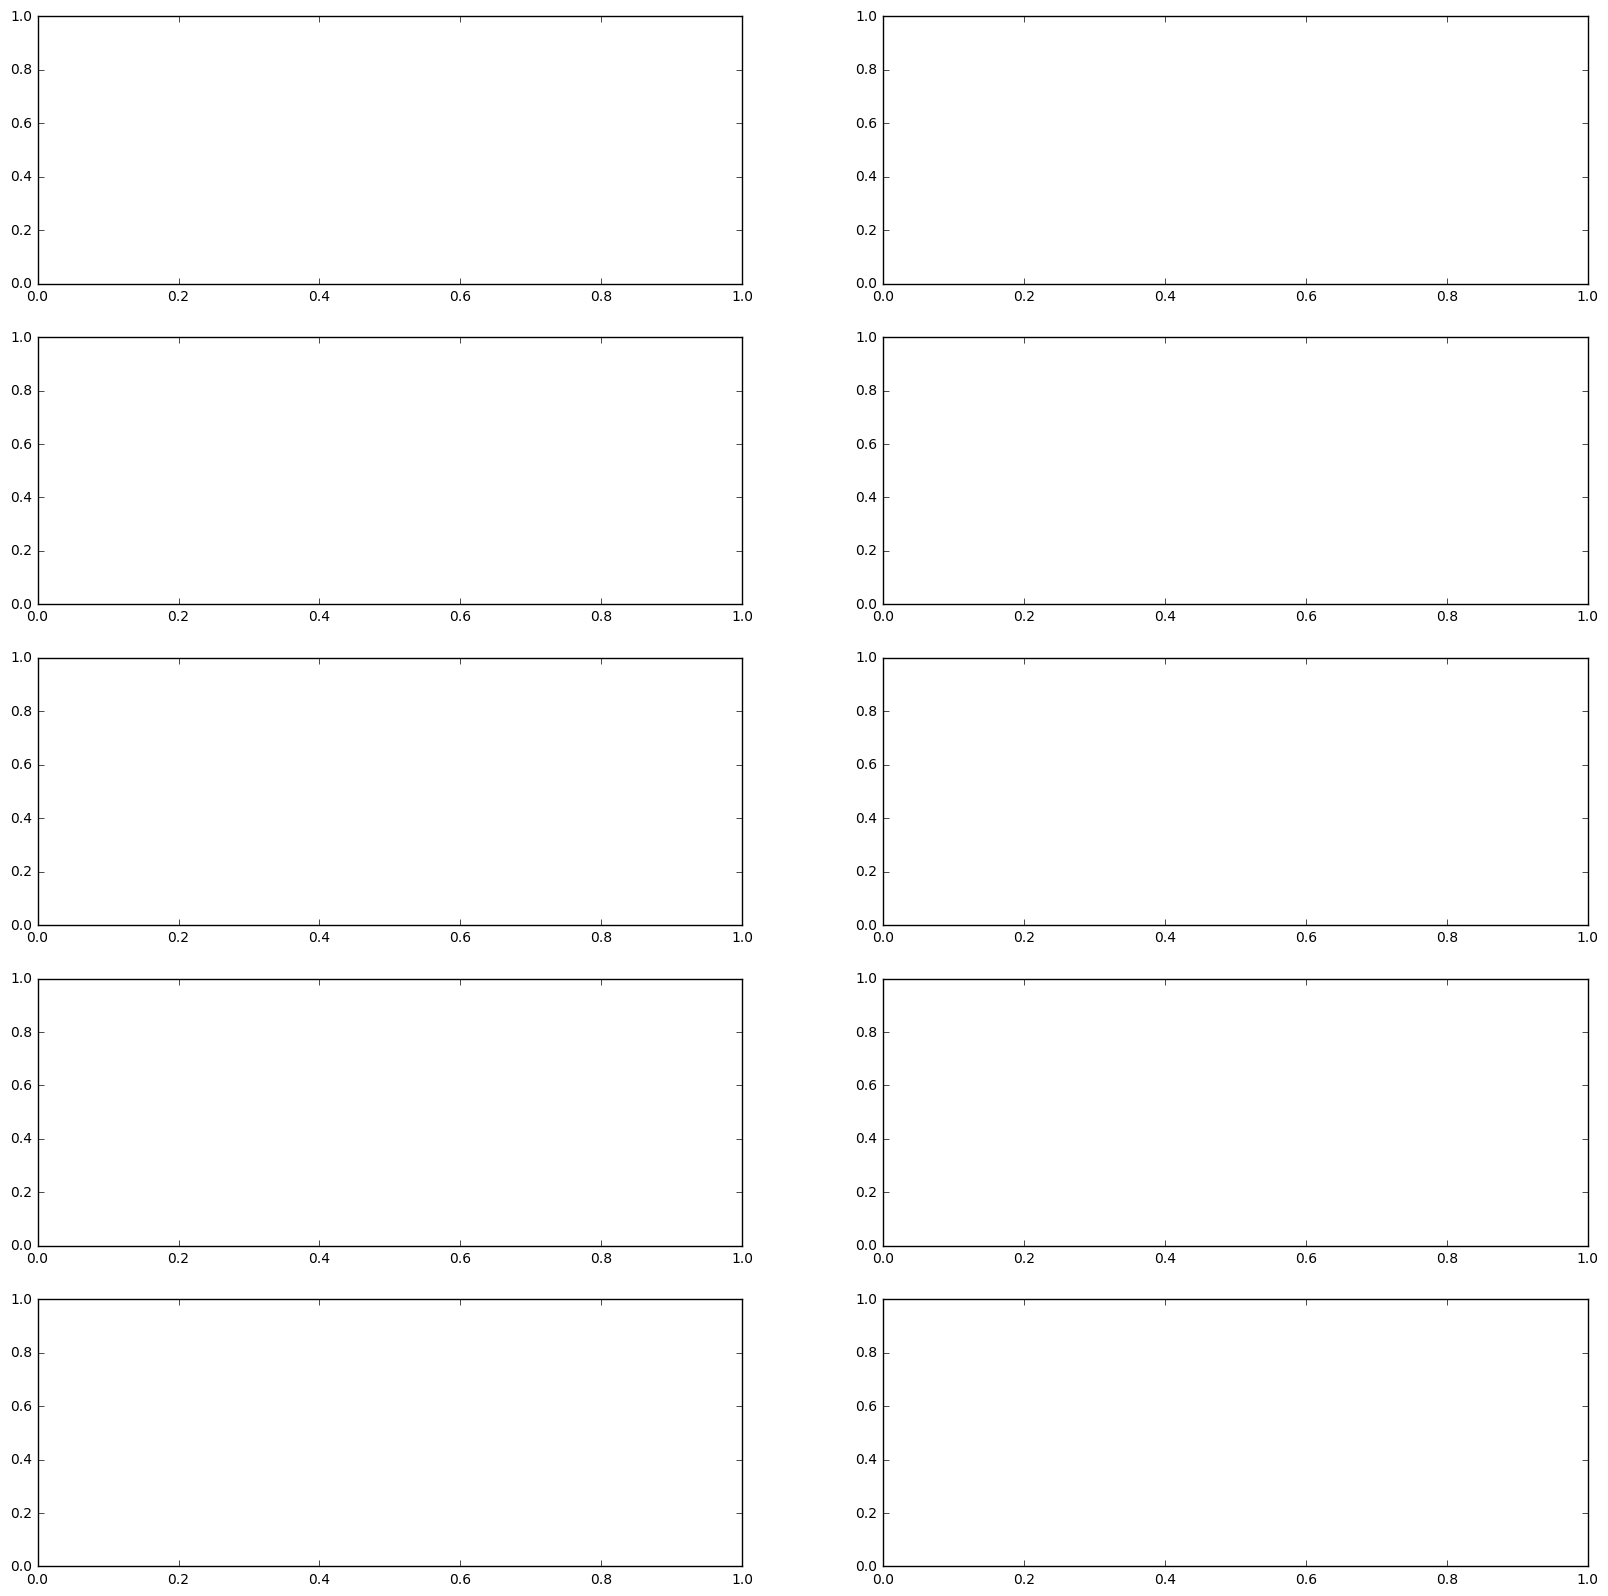

In [17]:
fig, ax = plt.subplots(nrows = len(bandits.keys()),ncols=2, figsize=(20,20))

In [19]:
three_color = '#FF19A9'
five_color = '#CCB214'
seven_color = '#00F0FF'

value_marker = 'x'
count_marker = 'o'
value_alpha = 0.5
count_alpha = .7

for idx, model in enumerate(bandits.keys()):
    ax_row = idx
    value_col = 0
    count_col = 1
    ax[ax_row][value_col].set_xlim([0, iterations])
    ax[ax_row][count_col].set_xlim([0, iteartions])
    ax[ax_row][value_col].set_ylim([0,1])
    ax[ax_row][count_col].set_ylim([0,1])
    
    ax[0].hlines(y=.3, xmin=0, xmax=iterations, color=three_color)
    ax[0].hlines(y=.5, xmin=0, xmax=iterations, color=five_color)
    ax[0].hlines(y=.7, xmin=0, xmax=iterations, color='green')

    ax[0].scatter(y=vals['three']['y'],x=vals['three']['x'], c=three_color, alpha=top_alpha, marker=top_marker)
    ax[0].scatter(y=vals['five']['y'],x=vals['five']['x'], c=five_color, alpha=top_alpha, marker=top_marker)
    ax[0].scatter(y=vals['seven']['y'],x=vals['seven']['x'], c='green', alpha=top_alpha, marker=top_marker)

    ax[1].scatter(y=[.3]*len(vals['three']['x']), x=vals['three']['x'], c = three_color, alpha = bot_alpha, marker=bot_marker)
    ax[1].scatter(y=[.5]*len(vals['five']['x']), x=vals['five']['x'], c = five_color, alpha = bot_alpha, marker=bot_marker)
    ax[1].scatter(y=[.7]*len(vals['seven']['x']), x=vals['seven']['x'], c = 'green', alpha = bot_alpha, marker=bot_marker)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

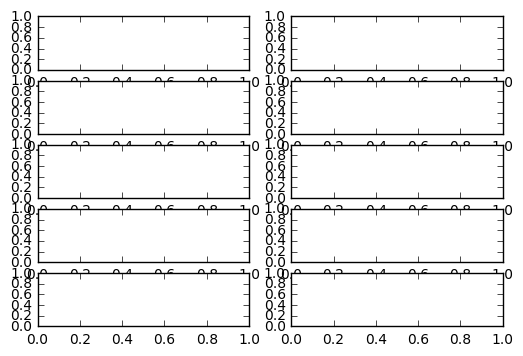